# 导入库

In [3]:
import numpy as np
import pandas as pd
# Data visualisation & Preparation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
#import scikitplot as skplt
from sklearn import preprocessing as prep
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE

# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Confusion Matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import plot_confusion_matrix
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

# Support Vector Classifications
from sklearn.svm import SVC

# 数据预处理

In [5]:
credit = pd.read_csv('F:/大三（上）/信用风险度量与管理/个人作业风险报告/附件1：案例数据UCI_Credit_Card.csv')
credit.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
credit.describe() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [21]:
credit.rename(columns={"default.payment.next.month": "default"}, inplace = True)

In [9]:
# check unique values in different features
print(credit.EDUCATION.unique())
print(credit.MARRIAGE.unique()) 

[2 1 3 5 4 6 0]
[1 2 3 0]


In [10]:
# 把教育程度4,5,6，0不知道是啥的类别全归为others
fil = (credit['EDUCATION'] == 5) | (credit['EDUCATION'] == 6) | (credit['EDUCATION'] == 0)
credit.loc[fil, 'EDUCATION'] = 4
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [11]:
# 婚姻状况同样的操作
fil = (credit['MARRIAGE'] == 0)
credit.loc[fil, 'MARRIAGE'] = 3
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [12]:
print(credit.EDUCATION.unique())
print(credit.MARRIAGE.unique())

[2 1 3 4]
[1 2 3]


# 探索性数据分析

In [72]:
credit2=credit.iloc[:,1:23]

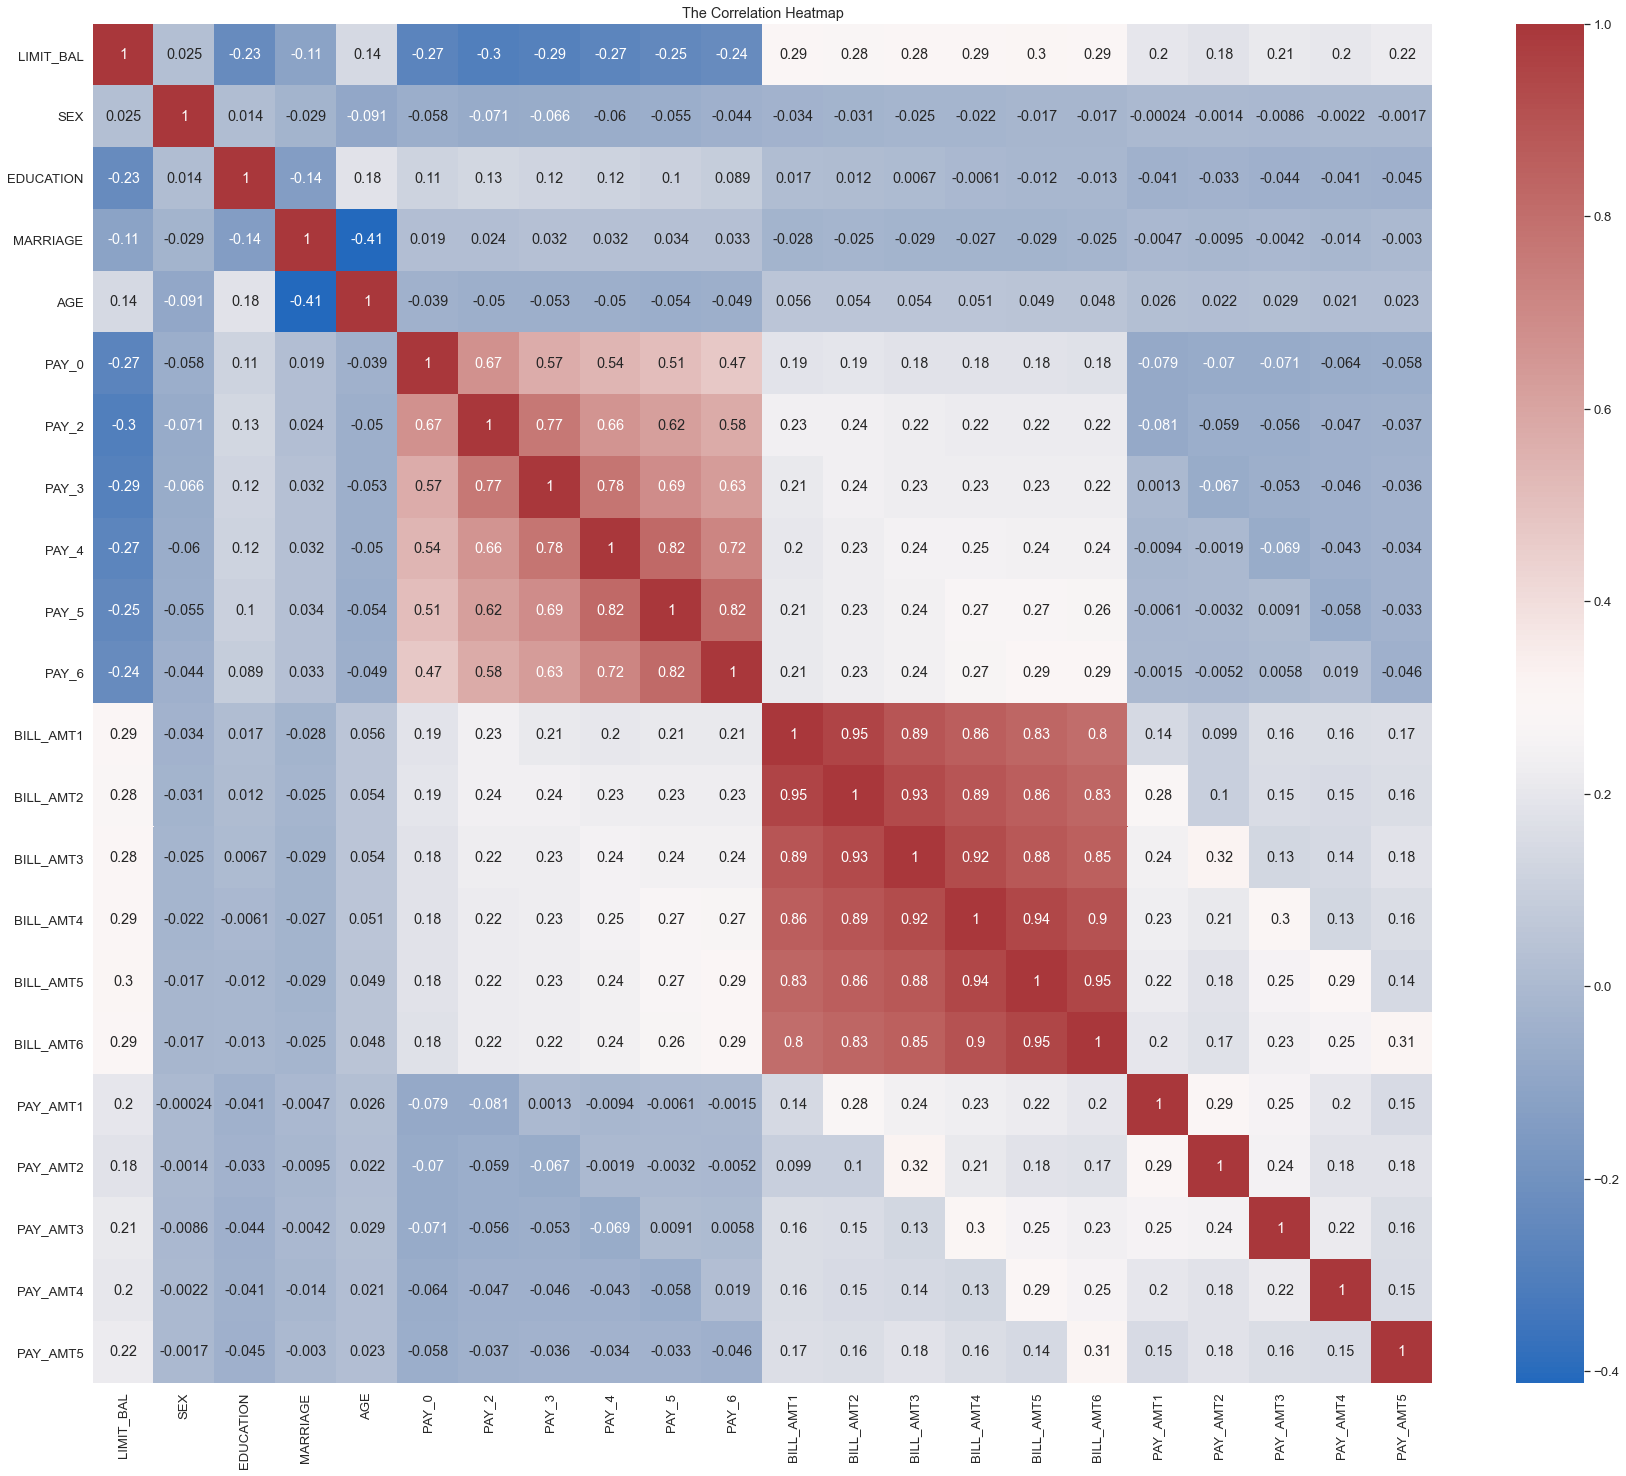

In [74]:
plt.figure(figsize = (30,25)) 
hm = credit2.corr()
sns.heatmap(hm, cmap = 'vlag', annot=True) 
plt.title('The Correlation Heatmap') 
plt.show()

E:\Anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


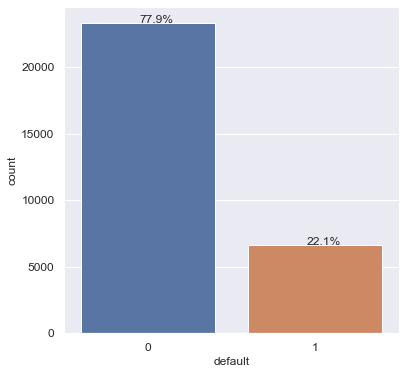

In [23]:
# 检查数据平衡
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

plt.figure(figsize = (6,6))
ax = sns.countplot('default', data = credit)
plt.xticks(size = 12)
plt.xlabel('default', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

without_hue(ax, credit.default)

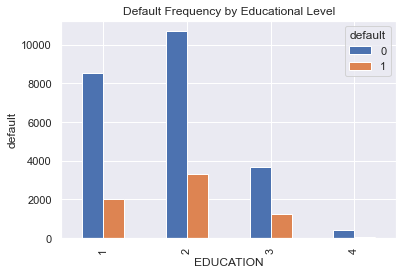

In [24]:
# Eduation
# 1：研究生、2：本科、3：高中、4：其他

pd.crosstab(credit.EDUCATION,credit.default).plot(kind='bar')
plt.title('Default Frequency by Educational Level')
plt.xlabel('EDUCATION')
plt.ylabel('default')
plt.show()

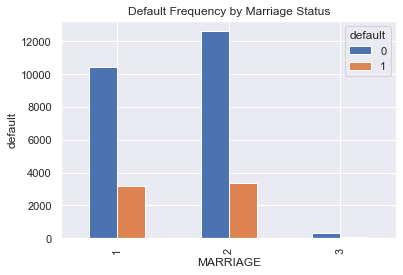

In [25]:
# Marriage
# 1: 已婚、2：未婚、3：其他

pd.crosstab(credit.MARRIAGE,credit.default).plot(kind='bar')
plt.title('Default Frequency by Marriage Status')
plt.xlabel('MARRIAGE')
plt.ylabel('default')
plt.show()

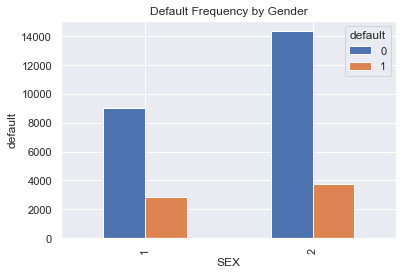

In [26]:
# SEX
# 1：男 、2：女

pd.crosstab(credit.SEX,credit.default).plot(kind='bar')
plt.title('Default Frequency by Gender')
plt.xlabel('SEX')
plt.ylabel('default')
plt.show()

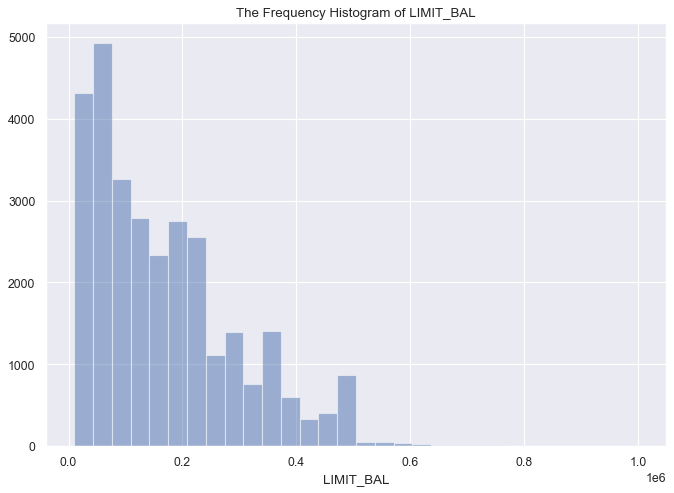

In [27]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(credit['LIMIT_BAL'], bins=30, alpha = 0.5)
plt.xlabel('LIMIT_BAL')

plt.title("The Frequency Histogram of LIMIT_BAL")
plt.show()

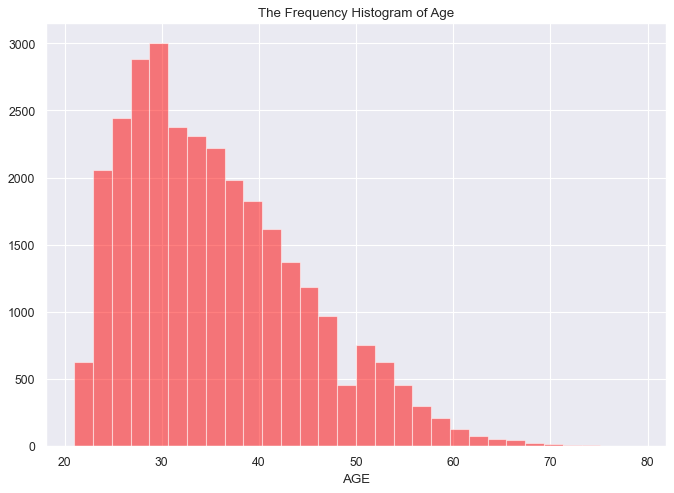

In [28]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(credit['AGE'], bins=30, facecolor='red', alpha = 0.5)
plt.xlabel('AGE')

plt.title("The Frequency Histogram of Age")
plt.show()

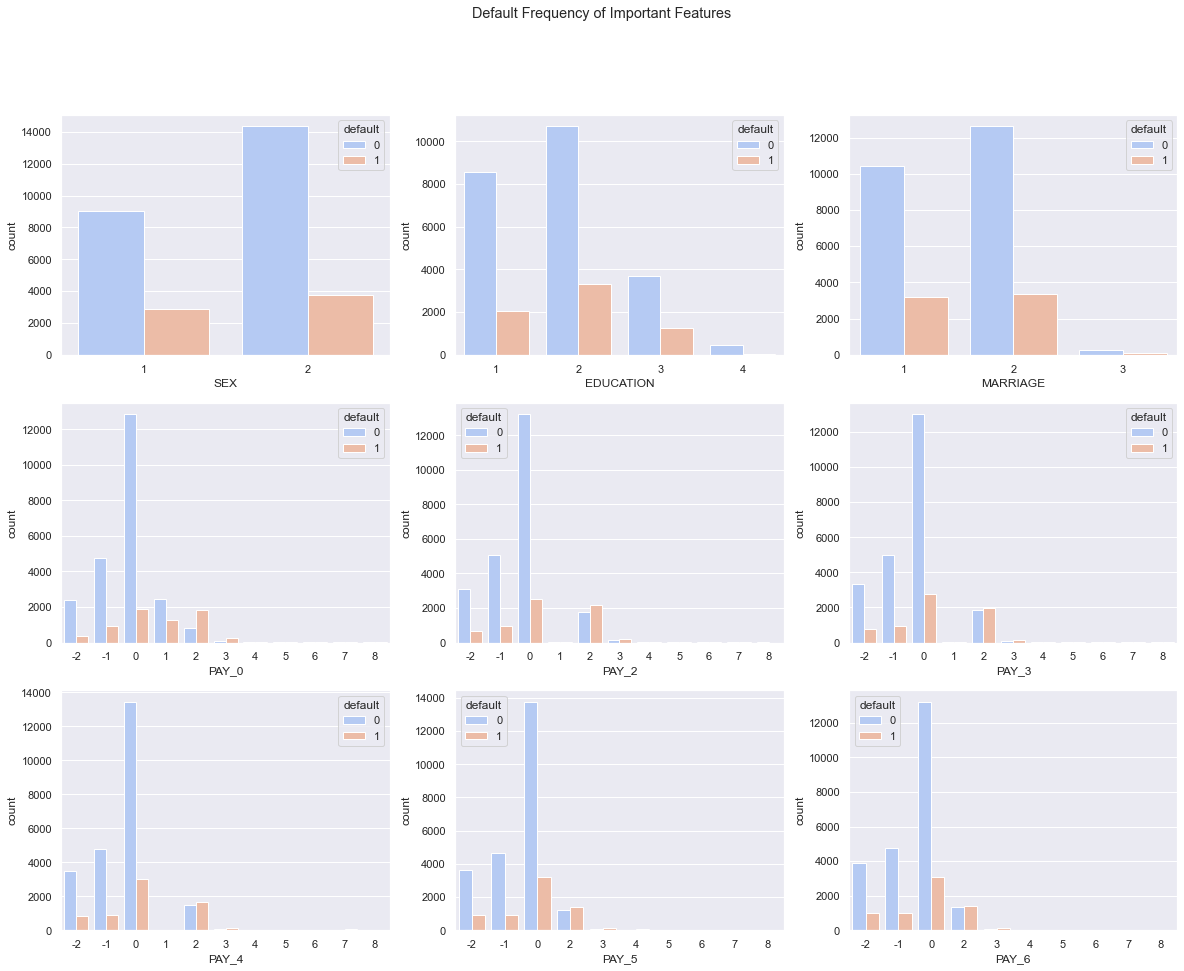

In [29]:
# 使用分类变量重新创建一个新的数据帧
subset = credit[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('Default Frequency of Important Features')
ax1 = sns.countplot(x="SEX", hue="default", data=subset, palette="coolwarm", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default", data=subset, palette="coolwarm",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default", data=subset, palette="coolwarm",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default", data=subset, palette="coolwarm", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default", data=subset, palette="coolwarm", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default", data=subset, palette="coolwarm", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default", data=subset, palette="coolwarm", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default", data=subset, palette="coolwarm", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default", data=subset, palette="coolwarm", ax=axes[2,2]);


AttributeError: 'Rectangle' object has no property 'normed'

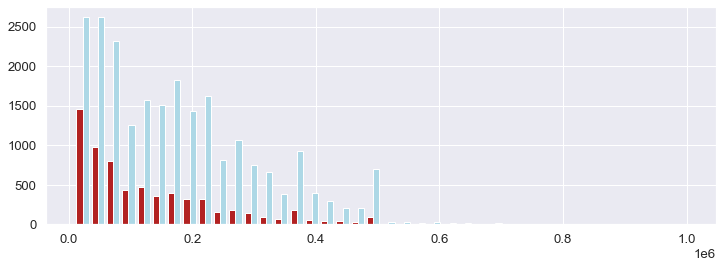

In [30]:
x1 = list(credit[credit['default'] == 1]['LIMIT_BAL'])
x2 = list(credit[credit['default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, normed=False, color=['firebrick', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('Default Histogram by Limit Balance', SIZE=15)
plt.box(False)
plt.show()

# 独热编码

In [31]:
# 教育水平
# generate binary values using get_dummies
credit_dum = pd.get_dummies(credit, columns=["EDUCATION"], prefix=["Edu"] )
# merge with main df bridge_df on key values
credit_dum = credit.merge(credit_dum, how='outer')
credit_dum

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Edu_1,Edu_2,Edu_3,Edu_4
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0,1,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,3526.0,8998.0,129.0,0.0,0.0,0,0,0,1,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0.0,22000.0,4200.0,2000.0,3100.0,1,0,1,0,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,3409.0,1178.0,1926.0,52964.0,1804.0,1,0,0,1,0


In [32]:
# 性别
# 使用get_dummies生成二进制值
credit_dum2 = pd.get_dummies(credit, columns=["SEX"], prefix=["SEX"] )
# 在键值上与主df bridge_df合并
credit_dum2 = credit_dum.merge(credit_dum2, how='outer')
credit_dum2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Edu_1,Edu_2,Edu_3,Edu_4,SEX_1,SEX_2
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,1,0,1,0,0,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,0.0,2000.0,1,0,1,0,0,0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,5000.0,0,0,1,0,0,0,1
3,4,50000.0,2,2,1,37,0,0,0,0,...,1100.0,1069.0,1000.0,0,0,1,0,0,0,1
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,9000.0,689.0,679.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,3047.0,5000.0,1000.0,0,0,0,1,0,1,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,129.0,0.0,0.0,0,0,0,1,0,1,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,4200.0,2000.0,3100.0,1,0,1,0,0,1,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,1926.0,52964.0,1804.0,1,0,0,1,0,1,0


In [33]:
# 婚姻
# 使用get_dummies生成二进制值
credit_dum3 = pd.get_dummies(credit, columns=["MARRIAGE"], prefix=["MARRIAGE"] )
# 在键值上与主df bridge_df合并
credit_dum3 = credit_dum2.merge(credit_dum3, how='outer')
credit_dum3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,default,Edu_1,Edu_2,Edu_3,Edu_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,1,0,1,0,0,0,1,1,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1,0,1,0,0,0,1,0,1,0
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,0,0,0,1,0,1,0,0,1,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,1,0,1,0,0,1,0,0,1,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,1,0,0,1,0,1,0,1,0,0


In [34]:
# Pay_0
# generate binary values using get_dummies
credit_dum4 = pd.get_dummies(credit, columns=["PAY_0"], prefix=["p0"] )
# merge with main df bridge_df on key values
credit_dum4 = credit_dum3.merge(credit_dum4, how='outer')
credit_dum4

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,p0_-1,p0_0,p0_1,p0_2,p0_3,p0_4,p0_5,p0_6,p0_7,p0_8
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0,0,0,1,0,0,0,0,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,1,0,0,0,0,0,0,0,0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0,0,0,0,0,1,0,0,0,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
# Pay_2
# generate binary values using get_dummies
credit_dum5 = pd.get_dummies(credit, columns=["PAY_2"], prefix=["p2"] )
# merge with main df bridge_df on key values
credit_dum5 = credit_dum4.merge(credit_dum5, how='outer')
credit_dum5

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,p2_-1,p2_0,p2_1,p2_2,p2_3,p2_4,p2_5,p2_6,p2_7,p2_8
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0,0,0,1,0,0,0,0,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,1,0,0,0,0,0,0,0,0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0,0,0,0,1,0,0,0,0,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
# Pay_3
# generate binary values using get_dummies
credit_dum6 = pd.get_dummies(credit, columns=["PAY_3"], prefix=["p3"] )
# merge with main df bridge_df on key values
credit_dum6 = credit_dum5.merge(credit_dum6, how='outer')
credit_dum6

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,p3_-1,p3_0,p3_1,p3_2,p3_3,p3_4,p3_5,p3_6,p3_7,p3_8
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,1,0,0,0,0,0,0,0,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,1,0,0,0,0,0,0,0,0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0,0,0,1,0,0,0,0,0,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
# Pay_4
# generate binary values using get_dummies
credit_dum7 = pd.get_dummies(credit, columns=["PAY_4"], prefix=["p4"] )
# merge with main df bridge_df on key values
credit_dum7 = credit_dum6.merge(credit_dum7, how='outer')
credit_dum7

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,p4_-1,p4_0,p4_1,p4_2,p4_3,p4_4,p4_5,p4_6,p4_7,p4_8
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,1,0,0,0,0,0,0,0,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,1,0,0,0,0,0,0,0,0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,1,0,0,0,0,0,0,0,0,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
# Pay_5
# generate binary values using get_dummies
credit_dum8 = pd.get_dummies(credit, columns=["PAY_5"], prefix=["p5"] )
# merge with main df bridge_df on key values
credit_dum8 = credit_dum7.merge(credit_dum8, how='outer')
credit_dum8

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,p5_-2,p5_-1,p5_0,p5_2,p5_3,p5_4,p5_5,p5_6,p5_7,p5_8
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,1,0,0,0,0,0,0,0,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,0,0,1,0,0,0,0,0,0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0,0,1,0,0,0,0,0,0,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
# Pay_6
# generate binary values using get_dummies
credit_dum9 = pd.get_dummies(credit, columns=["PAY_6"], prefix=["p6"] )
# merge with main df bridge_df on key values
credit_dum9 = credit_dum8.merge(credit_dum9, how='outer')
credit_dum9

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,p6_-2,p6_-1,p6_0,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,1,0,0,0,0,0,0,0,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,0,0,1,0,0,0,0,0,0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0,0,1,0,0,0,0,0,0,0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [40]:
credit_dum9 = credit_dum9.drop(['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1)
credit_dum9

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,p6_-2,p6_-1,p6_0,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,...,0,0,1,0,0,0,0,0,0,0
29996,29997,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,...,0,0,1,0,0,0,0,0,0,0
29997,29998,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,...,0,0,1,0,0,0,0,0,0,0
29998,29999,80000.0,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,...,0,1,0,0,0,0,0,0,0,0


In [41]:
credit_dum9.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 89 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          30000 non-null  int64  
 1   LIMIT_BAL   30000 non-null  float64
 2   AGE         30000 non-null  int64  
 3   BILL_AMT1   30000 non-null  float64
 4   BILL_AMT2   30000 non-null  float64
 5   BILL_AMT3   30000 non-null  float64
 6   BILL_AMT4   30000 non-null  float64
 7   BILL_AMT5   30000 non-null  float64
 8   BILL_AMT6   30000 non-null  float64
 9   PAY_AMT1    30000 non-null  float64
 10  PAY_AMT2    30000 non-null  float64
 11  PAY_AMT3    30000 non-null  float64
 12  PAY_AMT4    30000 non-null  float64
 13  PAY_AMT5    30000 non-null  float64
 14  PAY_AMT6    30000 non-null  float64
 15  default     30000 non-null  int64  
 16  Edu_1       30000 non-null  uint8  
 17  Edu_2       30000 non-null  uint8  
 18  Edu_3       30000 non-null  uint8  
 19  Edu_4       30000 non-nul

# 归一化:应用最小最大标量

In [42]:
minmax_scale = prep.MinMaxScaler().fit(credit_dum9)
credit_minmax = minmax_scale.transform(credit_dum9)
credit_minmax = pd.DataFrame(credit_minmax, columns = list(credit_dum9))
credit_minmax

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,p6_-2,p6_-1,p6_0,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8
0,0.000000,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000033,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000067,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000100,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000133,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.999867,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.999900,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.999933,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.999967,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


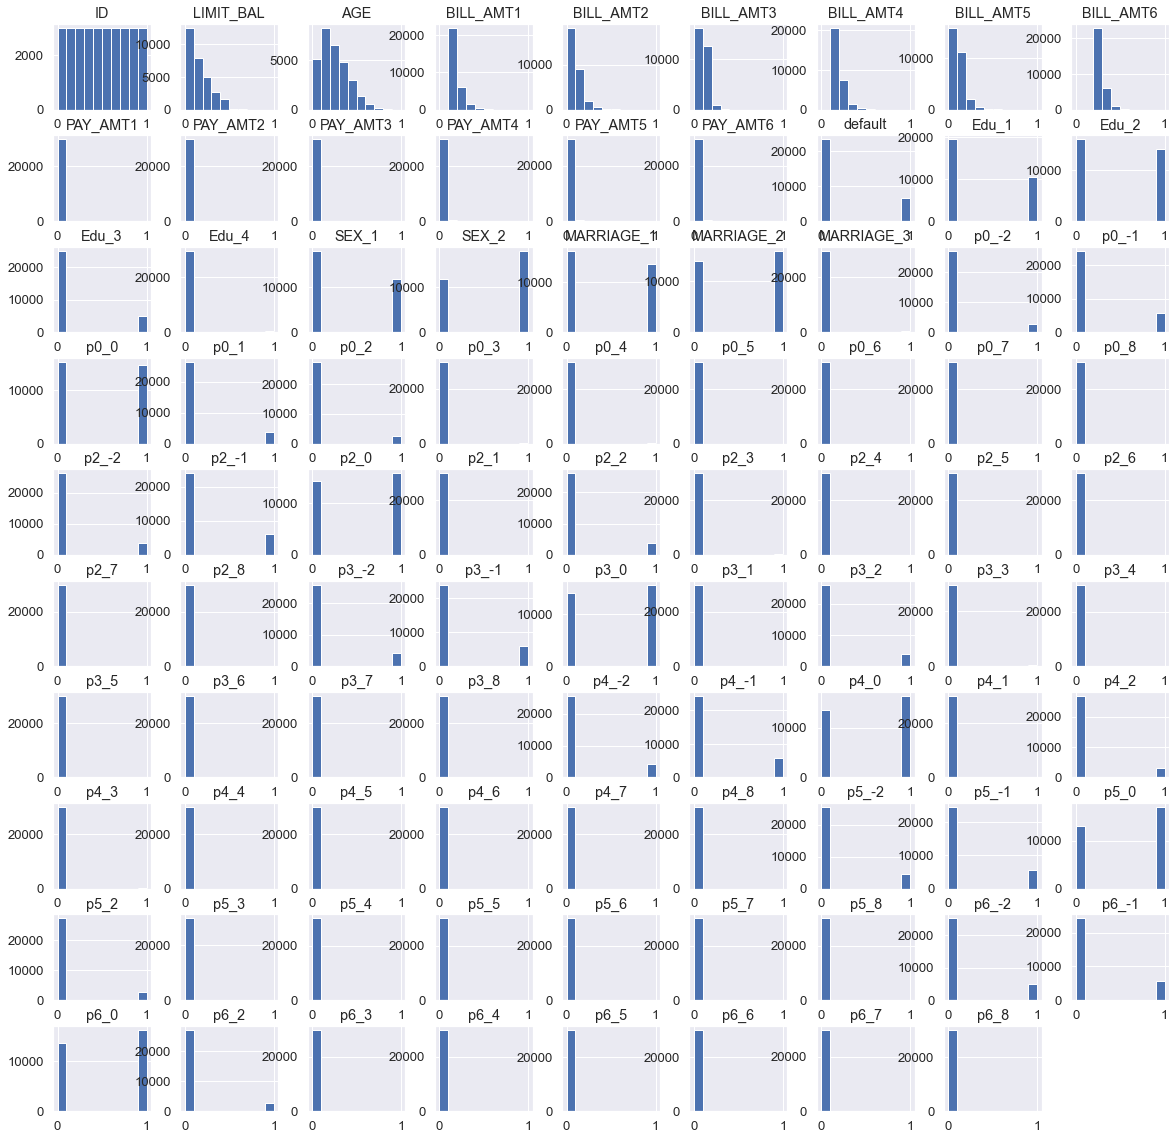

In [43]:
credit_minmax.hist(figsize=(20,20))
plt.show()

# 划分数据集

In [44]:
X = credit_minmax.drop(["default"],axis=1)
y = credit_minmax["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
# 描述关于训练和测试集的信息
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (24000, 88)
Number transactions y_train dataset:  (24000,)
Number transactions X_test dataset:  (6000, 88)
Number transactions y_test dataset:  (6000,)


In [47]:
# 在不平衡数据上运行逻辑回归模型
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test)
print("Accuracy:")
a = accuracy_score(y_test,prediction)
print(a)

prediction = dict()
prediction['Logistic'] = logreg.predict(X_test)
print('f1 Score:' ,metrics.f1_score(y_test, prediction['Logistic']))

confusion_matrix = cm(y_test, prediction['Logistic'])
print(confusion_matrix)

print(classification_report(y_test, prediction['Logistic']))

Accuracy:
0.8268333333333333
f1 Score: 0.4739240506329113
[[4493  210]
 [ 829  468]]
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      4703
         1.0       0.69      0.36      0.47      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



E:\Anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
# 定义训练集
df_train = pd.concat([X_train, y_train],axis=1)
df_train

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,p6_-1,p6_0,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8,default
3225,0.107504,0.010101,0.396552,0.161646,0.084358,0.096216,0.177828,0.080648,0.260979,0.003434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11815,0.393846,0.252525,0.155172,0.146665,0.066377,0.086495,0.160293,0.080978,0.261106,0.000189,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7338,0.244608,0.010101,0.310345,0.164450,0.085512,0.096941,0.178910,0.100682,0.276654,0.001717,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14980,0.499350,0.020202,0.034483,0.171494,0.094004,0.102066,0.188517,0.110916,0.283874,0.002061,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27167,0.905597,0.000000,0.137931,0.153842,0.074201,0.091066,0.169058,0.087282,0.268425,0.003205,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.437448,0.020202,0.293103,0.170256,0.083684,0.096465,0.176947,0.098731,0.269355,0.002404,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19648,0.654955,0.202020,0.206897,0.323364,0.247059,0.192154,0.344485,0.229904,0.366695,0.008013,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9845,0.328178,0.121212,0.379310,0.212018,0.134102,0.122785,0.201474,0.121365,0.283430,0.005724,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10799,0.359979,0.040404,0.137931,0.186835,0.111130,0.113277,0.167088,0.088683,0.267867,0.002862,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# 定义测试集
df_test = pd.concat([X_test, y_test],axis=1)
df_test

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,p6_-1,p6_0,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8,default
8225,0.274176,0.010101,0.206897,0.162421,0.082733,0.096808,0.177520,0.100236,0.275801,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10794,0.359812,0.010101,0.241379,0.161145,0.084581,0.096557,0.178036,0.099488,0.276348,0.003892,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9163,0.305444,0.222222,0.396552,0.149956,0.067121,0.087917,0.161017,0.080648,0.260979,0.001086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26591,0.886396,0.090909,0.362069,0.233618,0.161121,0.095205,0.176866,0.099264,0.276557,0.005724,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6631,0.221041,0.141414,0.137931,0.150575,0.072785,0.086801,0.166231,0.085743,0.266981,0.008001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12715,0.423847,0.242424,0.241379,0.320126,0.248192,0.199272,0.349466,0.296641,0.432545,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28867,0.962265,0.202020,0.431034,0.191401,0.115735,0.113224,0.207094,0.139210,0.307410,0.003561,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3758,0.125271,0.070707,0.103448,0.166324,0.077058,0.090199,0.165938,0.088190,0.263616,0.001717,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17842,0.594753,0.010101,0.051724,0.160889,0.081667,0.095522,0.177402,0.098234,0.275923,0.000687,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# 汇总目标变量分布(训练集)
count_class_0, count_class_1 = df_train.default.value_counts()
count_class_0, count_class_1

(18661, 5339)

Random Oversampling:
1.0    18661
0.0    18661
Name: default, dtype: int64


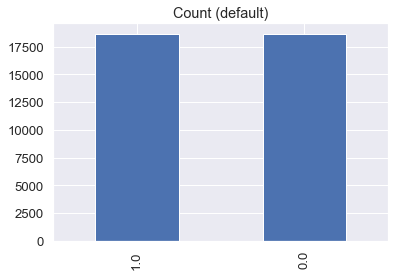

In [51]:
# 区分多数阶级和少数阶级
df_majority = df_train[df_train.default==0]
df_minority = df_train[df_train.default==1]

df_minority_upsampled = df_minority.sample(count_class_0, replace=True)
df_upsampled = pd.concat([df_majority,df_minority_upsampled],axis=0)
 
print('Random Oversampling:')
print(df_upsampled.default.value_counts())
 

df_upsampled.default.value_counts().plot(kind='bar', title='Count (default)');

# 分裂新的数据集

In [52]:
X_train_upsampled = df_upsampled.drop(["default"],axis=1)
y_train_upsampled = df_upsampled["default"]

# 逻辑回归

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train_upsampled, y_train_upsampled)
y_pred = logreg.predict(X_test)
confusion_matrix = cm(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[3888  815]
 [ 548  749]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      4703
         1.0       0.48      0.58      0.52      1297

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000



E:\Anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 随机森林

In [54]:
clf = RandomForestClassifier(n_jobs=1000,
                            random_state=9,
                            n_estimators=11,
                            verbose=False)
clf.fit(X_train_upsampled, y_train_upsampled)
prediction['RandomForest'] = clf.predict(X_test)
r = accuracy_score(prediction['RandomForest'],y_test)
print(r)

confusion_matrix = cm(y_test, prediction['RandomForest'])
print(confusion_matrix)
print(classification_report(y_test, prediction['RandomForest']))

0.8045
[[4267  436]
 [ 737  560]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      4703
         1.0       0.56      0.43      0.49      1297

    accuracy                           0.80      6000
   macro avg       0.71      0.67      0.68      6000
weighted avg       0.79      0.80      0.79      6000



# 决策树

In [55]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                                 max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(X_train_upsampled, y_train_upsampled)

prediction['DecisionTree'] = clf_gini.predict(X_test)
print("The Classification Report of Decision Tree Model")
t = classification_report(y_test, prediction['DecisionTree'])
print(t)

confusion_matrix = cm(y_test, prediction['DecisionTree'])
print(confusion_matrix)

The Classification Report of Decision Tree Model
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      4703
         1.0       0.57      0.43      0.49      1297

    accuracy                           0.81      6000
   macro avg       0.71      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000

[[4288  415]
 [ 742  555]]


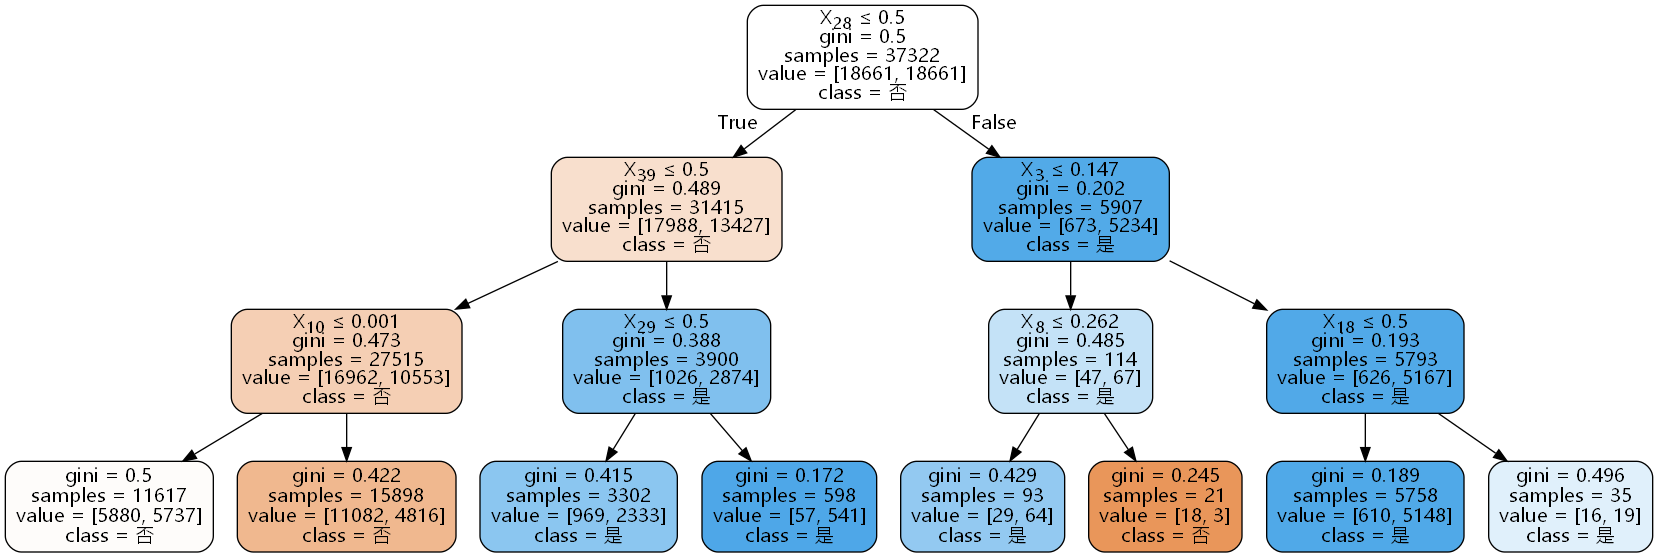

In [58]:
import graphviz 
import pydotplus 
import pydot

dot_tree= tree.export_graphviz(clf_gini, out_file=None, 
                                #feature_names=X.columns,
                                class_names=['否', '是'],
                                filled=True, rounded=True, 
                                special_characters=True)
graph_tree = pydotplus.graph_from_dot_data(dot_tree.replace('helvetica','"Microsoft Yahei"'))

from IPython.display import Image
Image(graph_tree.create_png())

# K-Nearest Neighbors

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_upsampled,y_train_upsampled)
pred = knn.predict(X_test)
print(cm(y_test,pred))
print(classification_report(y_test,pred))

[[3231 1472]
 [ 547  750]]
              precision    recall  f1-score   support

         0.0       0.86      0.69      0.76      4703
         1.0       0.34      0.58      0.43      1297

    accuracy                           0.66      6000
   macro avg       0.60      0.63      0.59      6000
weighted avg       0.74      0.66      0.69      6000



# 模型比较

In [60]:
random_seed = 12

In [61]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()),  
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('RandomForest', RandomForestClassifier())]

In [62]:
from sklearn import model_selection
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X_train_upsampled, y_train_upsampled, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

E:\Anaconda3\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
E:\Anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase

LogReg| Mean=0.646637 STD=0.111970
DecTree| Mean=0.882379 STD=0.083252


E:\Anaconda3\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN| Mean=0.730513 STD=0.096524


E:\Anaconda3\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForest| Mean=0.933526 STD=0.033366


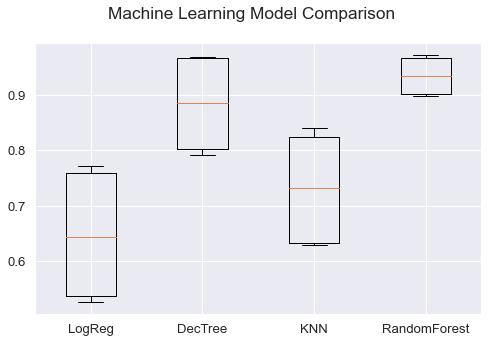

In [63]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()